In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [2]:
# Loading raw data into python dictonary
def loadDataset(path):
    label_names = None
    train_data = None 
    train_labels = None
    test_data = None
    test_labels = None
    dataDict = {}
    
    # Creating cifar-10 files list
    fileList = os.listdir(path)
    
    # extracting label_names
    with open(path+fileList[0], 'rb') as fo:
        dict = pickle.load(fo)
        label_names = dict['label_names']
        
    
    # extracting training_data, labels in numpy ndarrays
    for file in fileList[1:6]:
        with open(path+file, 'rb') as fo:
            dict = pickle.load(fo, encoding='bytes')
            if train_data is None:
                train_data = dict[b'data']
            else:
                train_data = np.concatenate((train_data, dict[b'data']))
            if train_labels is None:
                train_labels = dict[b'labels']
            else:
                train_labels = np.concatenate((train_labels, dict[b'labels']))
    
    # extracting test_data, labels in numpy ndarrays
    with open(path+fileList[7], 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
        test_data = dict[b'data']
        test_lables = dict[b'labels']
        
    #creating dictonary of dataset
    dataDict['label_names'] = label_names
    dataDict['train_data'] = train_data
    dataDict['train_labels'] = train_labels
    dataDict['test_data'] = test_data
    dataDict['test_labels'] = test_lables
    
    return dataDict

In [3]:
# loading dataset
dataset = loadDataset('./cifar-10-batches-py/')

In [4]:
# Generating 10 random unique test data
def genTestData():
    test_labels = dataset['test_labels']
    dataInd = []
    data = set()
    i = np.random.randint(500)
    while len(data) != 10:
        if(test_labels[i] not in data):
            dataInd.append(i)
            data.add(test_labels[i])
        i+=1
    return dataInd

In [5]:
# Creating k-Nearest Neighbors
class KNN:
    def train(self, train_data):
        self.train_data = train_data
    def predict(self, test_data):
        predict_data = []
        for i,data in enumerate(self.train_data):
            predict_data.append([distance.euclidean(data, test_data), i])
        return sorted(predict_data)

In [6]:
knn = KNN()

In [7]:
knn.train(dataset['train_data'])

In [17]:
def getImage(data):
    img = data
    R = img[:1024].reshape(32, 32)
    G = img[1024:2048].reshape(32, 32)
    B = img[2048:].reshape(32, 32)
    return np.dstack((R, G, B))

def showPredictImage(data):
    fig,ax = plt.subplots(1, 10, figsize=(10, 10))
    for i, axi in enumerate(ax.flat):
        axi.imshow(getImage(data[i][0]), cmap='binary')
        axi.set(xticks=[], yticks=[])
        axi.set_title(dataset['label_names'][data[i][1]])
        # print(dataset['train_labels'][data[i][1]])

In [18]:
# Generating 10 random unique test data
td = genTestData()

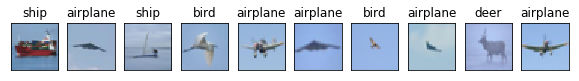

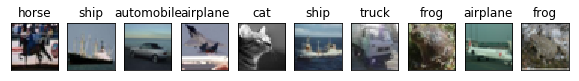

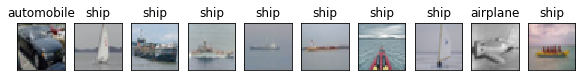

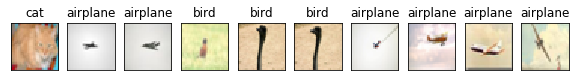

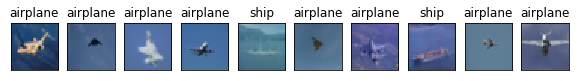

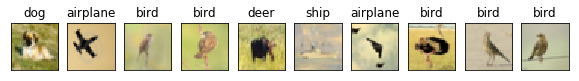

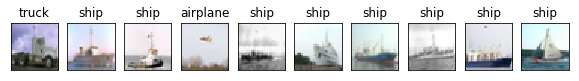

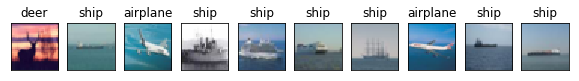

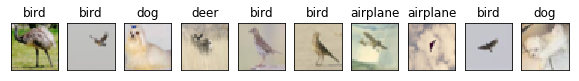

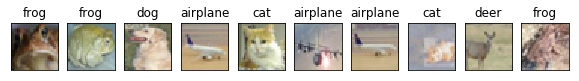

In [19]:
for t in td:
    predict_data = knn.predict(dataset['test_data'][t])[:10]
    data = [(dataset['test_data'][t], dataset['test_labels'][t])]
    for pd in predict_data:
        data.append((dataset['train_data'][pd[1]], dataset['train_labels'][pd[1]]))
    showPredictImage(data)